- Orlando Cabrera #19943
- Diana Zaray Corado #191025
- Pablo Méndez #19195

# Laboratorio 5 - Análisis de Sentimientos

Utilice el dataset  Natural Language Processing with Disaster Tweets  de Kaggle.  Debe hacer un análisis exploratorio para entender mejor los datos, sabiendo que el objetivo final clasificar si un tweet se refiere a un desastre real no. Genere un informe en pdf con las explicaciones de los pasos que llevó a cabo y los resultados obtenidos. Recuerde que la investigación debe ser reproducible por lo que debe guardar el código que ha utilizado para resolver los ejercicios y/o cada uno de los pasos llevados a cabo si utiliza una herramienta visual. Incluya una nube de palabras que le ayude a detectar las que más se repiten. 

In [1]:
from textblob import TextBlob
import pandas as pd
import re
import nltk
import seaborn as sns
sns.set_theme(style="whitegrid", palette='Set2')
from collections import defaultdict
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
data = pd.read_csv("train.csv")
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


## Descripción de los datos
El conjunto de datos fue obtenido gracias a la página Kaggle. Este conjunto de datos posee un total de 7613 observaciones. Además, cuenta con 5 variables, las cuales son: id, keyword, location, text y target. De estas variables, todas son categoricas. 


## Preprocesamiento

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Convertir el Texto a Minúsculas

In [27]:
data['text'] = data['text'].str.lower()
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


### Quitar URLs

In [5]:
expression = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"

data['text'] = data['text'].apply(lambda s: re.sub(expression, "", s))
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


### Remover caracteres especiales

Se eliminarán todas las palabras que empiezan con '@', ya que hacen referencia a un usuario. Esto es para evitar que la red neuronal sea afectada por nombres de usuarios complejos, como *@wildifires_are_bad*.

In [28]:
expression = r"\B@\w*"
data['text'] = data['text'].apply(lambda s: re.sub(expression, "", s))
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


Para facilitar el aprendizaje del modelo, se removerán todos los caracteres que no son letras.

In [29]:
expression = "[^a-z ]"
data['text'] = data['text'].apply(lambda s: re.sub(expression, "", s))
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


### Quitar las "stopwords"
Los *stopwords* son palabras que no proporcionan mucho significado a una frase desde el punto de vista de ML. La librería nltk proporciona una lista de stopwords en diferentes idiomas.

In [30]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(s):
    words = [word for word in s.split(" ") if not word in stopwords]
    return " ".join(words)

data['text'] = data['text'].apply(remove_stopwords)
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


## Unigramas y Bigramas

In [9]:
real_disaster = data[data.target == 1].text
fake_disaster = data[data.target == 0].text
real_disaster

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3        people receive wildfires evacuation orders ca...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609      control wild fires california even northern ...
7610                                utckm volcano hawaii 
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 3271, dtype: object

In [34]:
real_unigrams = real_disaster.apply(lambda s: TextBlob(s).ngrams(n=1))
fake_unigrams = fake_disaster.apply(lambda s: TextBlob(s).ngrams(n=1))
real_bigrams = real_disaster.apply(lambda s: TextBlob(s).ngrams(n=2))
fake_bigrams = fake_disaster.apply(lambda s: TextBlob(s).ngrams(n=2))
# Frecuencia de palabras en un desastre real
unireal = defaultdict(int)
unifake = defaultdict(int)
bireal = defaultdict(int)
bifake = defaultdict(int)
for gram in real_unigrams:
    for word in gram:
        unireal[word[0]] += 1
for gram in fake_unigrams:
    for word in gram:
        unifake[word[0]] += 1
for word in real_bigrams:
    bireal[word[0]] += 1
for gram in fake_bigrams:
    for word in gram:
        bifake[word[0]] += 1
# visualizacion de frecuencias
df_unireal = pd.DataFrame([[key, unireal[key]] for key in unireal.keys()], columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
df_unifake = pd.DataFrame([[key, unifake[key]] for key in unifake.keys()], columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
df_bireal = pd.DataFrame([[key, bireal[key]] for key in bireal.keys()], columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
df_bifake = pd.DataFrame([[key, bireal[key]] for key in bireal.keys()], columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

TypeError: unhashable type: 'WordList'

MUEEEEEVETEEEE

rd']
['drafted', 'rd']
['drafted', 'rd']
['drafted', 'rd']
['drafted', 'rd']
['got', 'videos']
['got', 'videos']
['got', 'videos']
['got', 'videos']
['yo', 'flex']
['yo', 'flex']
['avalanche', 'one']
['avalanche', 'one']
['avalanche', 'one']
['avalanche', 'one']
['avalanche', 'one']
['avalanche', 'one']
['avalanche', 'one']
['avalanche', 'one']
['possible', 'new']
['possible', 'new']
['possible', 'new']
['possible', 'new']
['possible', 'new']
['feat', 'watch']
['feat', 'watch']
['feat', 'watch']
['feat', 'watch']
['feat', 'watch']
['feat', 'watch']
['snowflake', 'avalanche']
['snowflake', 'avalanche']
['snowflake', 'avalanche']
['snowflake', 'avalanche']
['dragon', 'ball']
['dragon', 'ball']
['dragon', 'ball']
['dragon', 'ball']
['dragon', 'ball']
['dragon', 'ball']
['dragon', 'ball']
['added', 'video']
['added', 'video']
['added', 'video']
['added', 'video']
['added', 'video']
['added', 'video']
['added', 'video']
['added', 'video']
['added', 'video']
['added', 'video']
['added', 'vid

<AxesSubplot:xlabel='Count', ylabel='Word'>

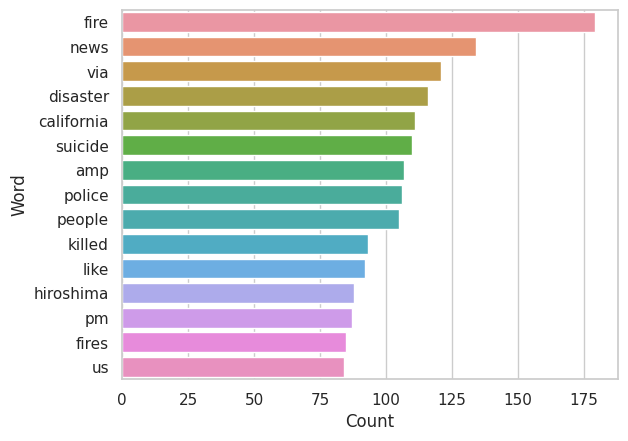

In [19]:
sns.barplot(y=df_unireal.Word.head(15), x=df_unireal.Count.head(15))

<AxesSubplot:xlabel='Count', ylabel='Word'>

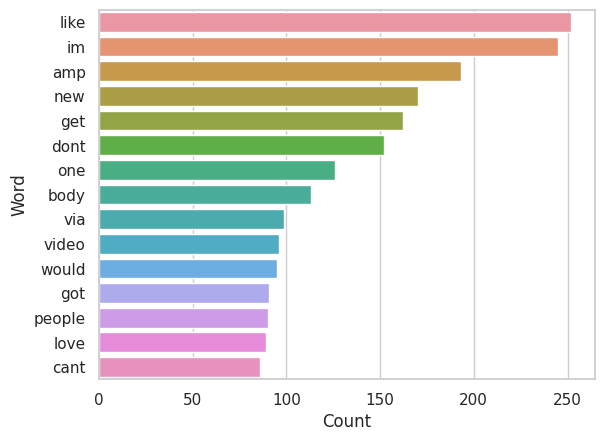

In [14]:
sns.barplot(y=df_unifake.Word.head(15), x=df_unifake.Count.head(15))

<AxesSubplot:xlabel='Count', ylabel='Word'>

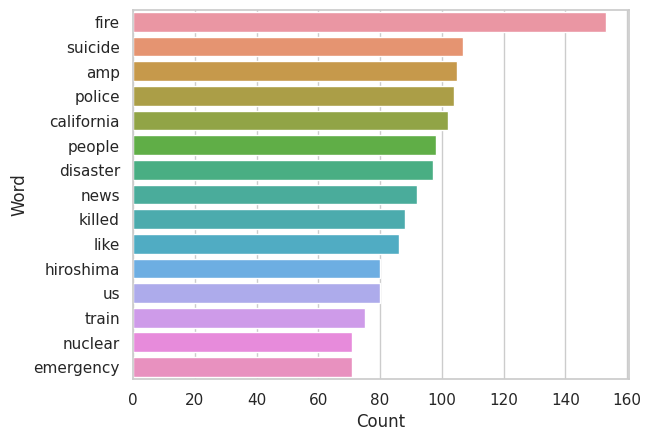

In [15]:
sns.barplot(y=df_bireal.Word.head(15), x=df_bireal.Count.head(15))

## Algoritmo de Clasificación en Tweets

In [31]:
data['positivity'] = data['text'].apply(lambda s: TextBlob(s).sentiment.polarity)
data.head()

,id,keyword,location,text,target,positivity
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,0.0
1,4,NaN,NaN,forest fire near la ronge sask canada,1,0.1
2,5,NaN,NaN,residents asked shelter place notified officer...,1,-0.1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1,0.0
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6256abd-9809-4d9d-915d-728b90aa1a2e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>